In [2]:
import tarfile

#extract images from tar file download, used ChatGPT for code assistance here
def extract_cifar100(file_path, extract_path):
    with tarfile.open(file_path, 'r') as tar:
        tar.extractall(path=extract_path)

file_path = "/content/cifar-100-python.tar"
extract_path = "/content/cifar-100-python"
extract_cifar100(file_path, extract_path)

In [3]:
import pickle

#loading extracted data, once again thank you ChatGPT
def load_cifar100(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f, encoding='bytes')
            images = data[b'data']
            labels = data[b'fine_labels']
            return images, labels
    except Exception as e:
        print(f"Error during loading: {str(e)}")
        return None, None


flattened_images, labels = load_cifar100(extract_path + "/cifar-100-python/train")  #Specify train or test images

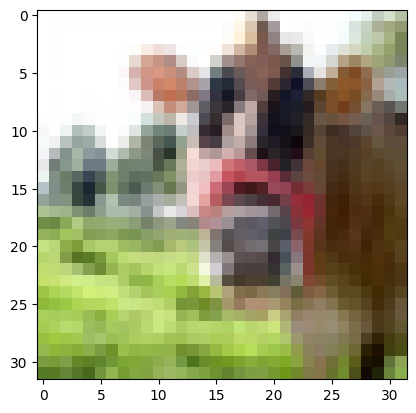

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#reshape images in order to display them properly
vector_images = np.reshape(flattened_images, (-1, 1024, 3), "F")
square_images = np.reshape(vector_images, (-1, 32, 32, 3))

#display first image as a test
plt.imshow(square_images[0])

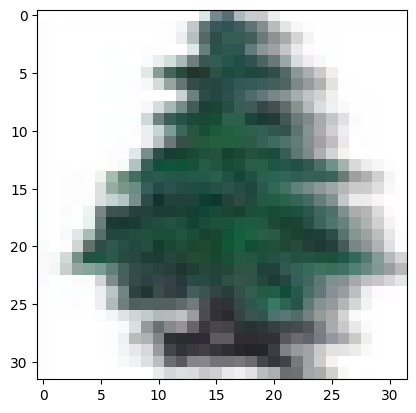

In [107]:
#display images for hand labelling, reran many times
plt.imshow(square_images[849])

In [111]:
#lists of images for each category based on hand labelling
foreground_index = np.array([2,21,41,51,95,126,141,184,185,213,221,286,304,311,352,353,355,
                             367,370,384,388,411,445,447,459,465,489,497,500,553,556,560,573,
                             576,582,587,591,592,604,633,636,649,654,658,675,701,719,727,732,
                             737,739,740,741,768,788,789,796,798,821,822,837])

background_index = np.array([0,3,5,36,39,44,58,60,65,70,150,174,190,211,225,240,251,252,291,
                             297,298,307,381,403,462,484,502,503,551,641,663,685,696,698,
                             746,747,761,773,779,802])

exclude_index = np.array([90,92,101,122,186,200,223,282,299,305,308,319,324,343,379,387,419,
                          433,441,481,490,492,538,563,571,578,597,603,634,641,670,730,751,756])

Text(0.5, 1.0, '1D: Excluded Image')

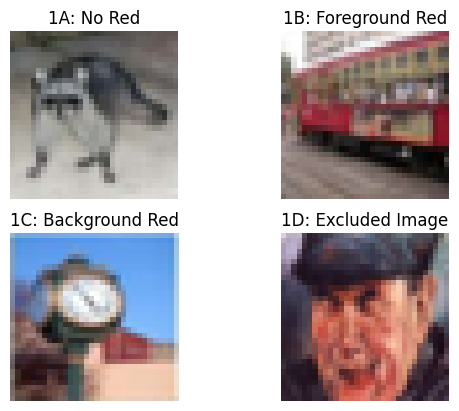

In [157]:
#display example images for each category to create figure 1
fig, axes = plt.subplots(2, 2)

axes[0,0].imshow(square_images[333]) #show image
axes[0,0].axis("off") #hide tick marks
axes[0,0].set_title("1A: No Red") #label

axes[0,1].imshow(square_images[654])
axes[0,1].axis("off")
axes[0,1].set_title("1B: Foreground Red")

axes[1,0].imshow(square_images[747])
axes[1,0].axis("off")
axes[1,0].set_title("1C: Background Red")

axes[1,1].imshow(square_images[122])
axes[1,1].axis("off")
axes[1,1].set_title("1D: Excluded Image")


In [162]:
#create target list
all_targets = np.zeros(850)

#0 is no red, 1 is foreground/prominent red, 2 is background red
for i in foreground_index:
  all_targets[i] = 1

for i in background_index:
  all_targets[i] = 2

In [164]:
#make new array of labelled images only
all_labelled_images = square_images[:850,:,:,:]

#make copy to prepare for deleting entries
labelled_images = all_labelled_images
targets = all_targets

#delete excluded images
for i in exclude_index:
  np.delete(labelled_images, i, axis = 0)
  np.delete(targets, i)

print(labelled_images.shape)
print(targets.shape)

(850, 32, 32, 3)
(850,)


In [167]:
#save labelled images and target list as npz file
np.savez('/content/preprocessed_images_and_labels.npz', images=labelled_images, labels=targets)